In [9]:
pip install pytrends pandas numpy sklearn matplotlib

Note: you may need to restart the kernel to use updated packages.


請輸入要查幾個關鍵字(最多5個)
None2
請輸入關鍵字
None酒精
請輸入關鍵字
None疫苗
['酒精', '疫苗']
請輸入希望的時間區間：
 -特定日期範圍輸入1
 -幾個月內輸入2
 -幾天內輸入3
 -五年內請輸入4
請輸入:
None2
只能搜尋1,2,3個月內
請輸入:1
today 1-m


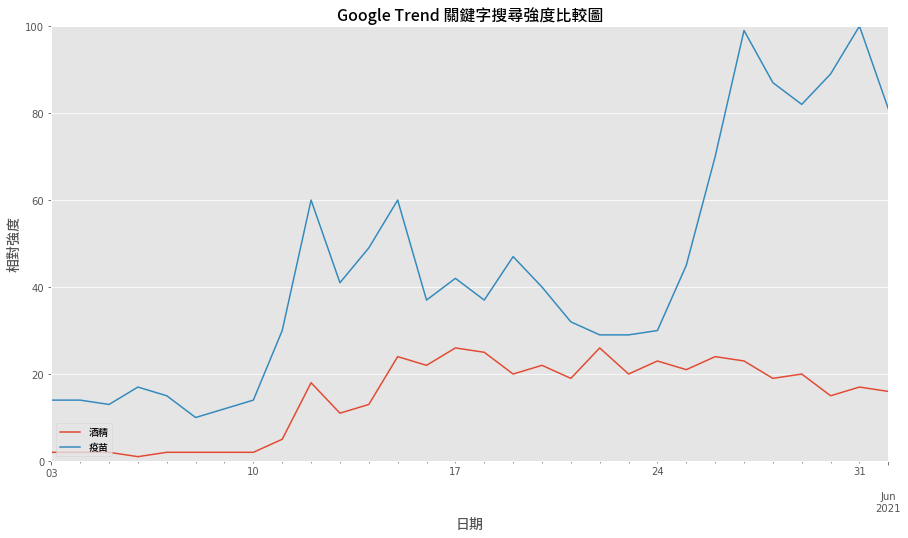

In [11]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd
import matplotlib.ticker

kw_list = [] 
pytrend = TrendReq(hl='zh-TW', tz=1200)
num = int(input(print("請輸入要查幾個關鍵字(最多5個)")))
for i in range (num):
    keywords = str(input(print("請輸入關鍵字")))
    kw_list.append(keywords)
print(kw_list)

time_mode = int(input(print("請輸入希望的時間區間：\n -特定日期範圍輸入1\n -幾個月內輸入2\n -幾天內輸入3\n -五年內請輸入4\n請輸入:")))
if time_mode == 1:
    time_want = str(input("輸入格式範例 2021-01-01 2021-01-31\n請輸入:"))
elif time_mode == 2:
    time_input = str(input("只能搜尋1,2,3個月內\n請輸入:"))
    time_want = 'today ' + str(time_input) + '-m'
elif time_mode == 3:
    time_input = str(input("只能搜尋1,7天內\n請輸入:"))
    time_want = 'now ' + str(time_input) + '-d'
elif time_mode == 4:
    time_want = str("today 5-y")
else :
    print("錯誤，請重來！")

print(time_want)
pytrend.build_payload(kw_list=kw_list, cat=0, timeframe= time_want, geo='TW', gprop='' )
trends = pytrend.interest_over_time()

if all(trends.isPartial == False):
    del trends['isPartial']

font = FontProperties(fname="NotoSansCJKtc-Medium.otf")
def plot_trends(df):
    fig = plt.figure(figsize = (15,8))
    ax = fig.add_subplot(111)
    df.plot(ax=ax)
    ax.legend(prop=font)
    #plt.rc('legend', fontproperties=font, fontsize=16)
    plt.ylabel("相對強度", fontproperties=font, fontsize=14)
    plt.xlabel("日期", fontproperties=font, fontsize=14)
    plt.title('Google Trend 關鍵字搜尋強度比較圖',fontproperties=font, fontsize=16)
    plt.ylim((0,100))
    #plt.legend(loc='lower left')
    plt.legend(loc='lower left',prop=font)
    #plt.legend(prop={'family' : 'Times New Roman', 'size'   : 16})
    return ax
plt.style.use('ggplot')
ax = plot_trends(trends)
plt.show()
